# Multiclass Classification
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow as tf

When u have more than two class as an option, it's known as **multi-class classification**

[Fashion Mnist](https://github.com/zalandoresearch/fashion-mnist)

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [12]:
RANDOM_SEED = 42

In [13]:
# Fashion company to classify different images of clothing (Fashion MNIST dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [14]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [15]:
# Check the shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

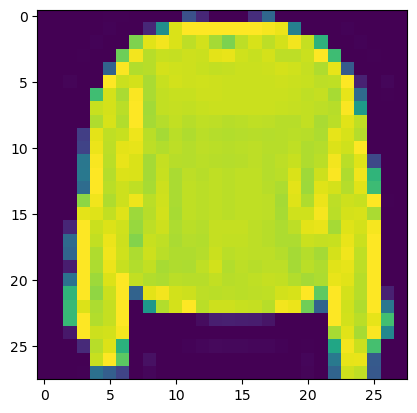

In [16]:
# plot a single sample
plt.imshow(train_data[7])

In [17]:
train_labels[7]

2

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

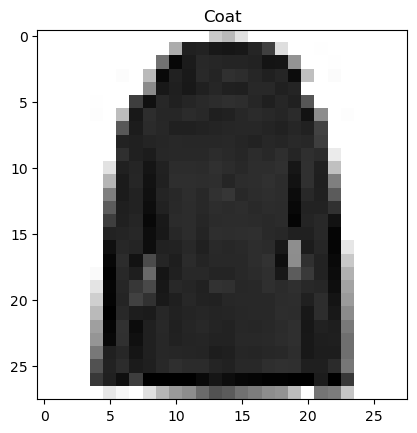

In [19]:
index = 2000
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

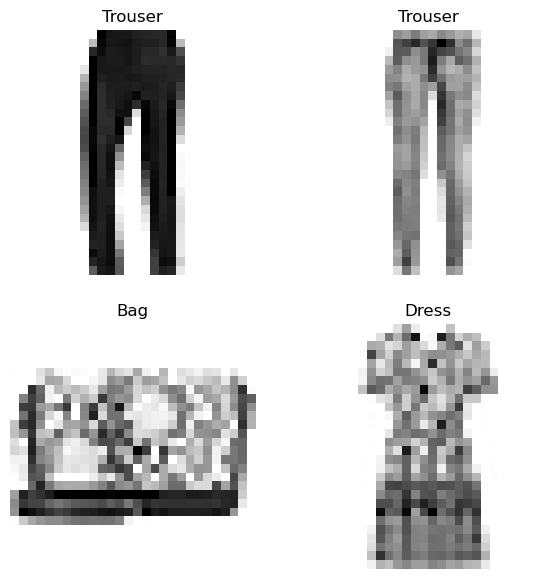

In [20]:
# Multiple random images of fashion MNIST
import random

plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    random_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[random_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_index]])
    plt.axis(False)

* Input Shape = 28 x 28
* Output Shape = 10 (one per class of clothing)
* Loss function =  tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded use `tf.keras.losses.CategoricalCrossentropy()`
    * If it is of integer form use `tf.keras.losses.SparseCategoricalCrossentropy()`
* Output Activation = tf.keras.activations.softmax() 

In [23]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [27]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [29]:
tf.random.set_seed(RANDOM_SEED)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
  13/1875 [..............................] - ETA: 16s - loss: 264.5473 - accuracy: 0.1154

2023-09-17 13:00:41.052847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 66.5591 - accuracy: 0.1682

2023-09-17 13:00:57.016337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 10ms/step - loss: 66.4302 - accuracy: 0.1685 - val_loss: 7.2509 - val_accuracy: 0.3350
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 10.2738 - accuracy: 0.3877 - val_loss: 2.6331 - val_accuracy: 0.4532
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 2.0710 - accuracy: 0.4569 - val_loss: 3.1525 - val_accuracy: 0.3696
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 2.2436 - accuracy: 0.4714 - val_loss: 2.0888 - val_accuracy: 0.5073
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 2.1103 - accuracy: 0.4943 - val_loss: 2.2407 - val_accuracy: 0.4644
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 2.3640 - accuracy: 0.4703 - val_loss: 2.3772 - val_accuracy: 0.3440
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 3.7767 - accuracy: 0.3545 - val_loss: 7.4119 - val_accura

In [87]:
def plot_curves(histories, line_settings, columns, y_label, x_label='epochs'):
    for history, line_setting in zip(histories, line_settings):
        pd.DataFrame(history.history).loc[:, columns].plot(label=line_setting['label'],
                                                           linestyle=line_setting['line_style'],
                                                           marker=line_setting['marker'])
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc='best')

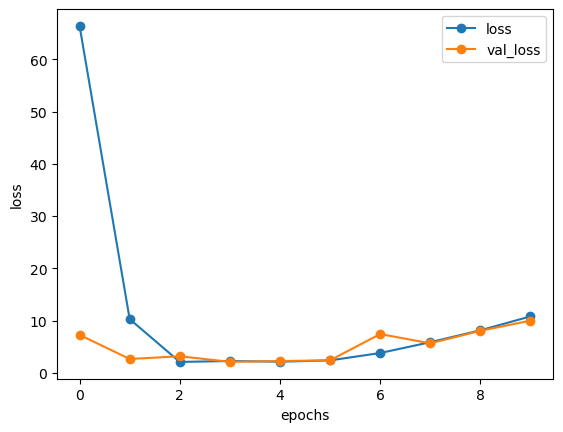

In [88]:
plot_curves(histories=[non_norm_history],
            line_settings=[{'label': 'non_norm', 'line_style': '-', 'marker': 'o'}],
            columns=['loss', 'val_loss'], y_label='loss')

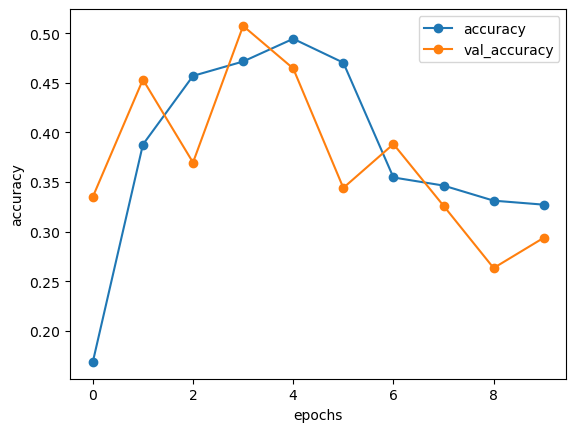

In [89]:
plot_curves(histories=[non_norm_history],
            line_settings=[{'label': 'non_norm', 'line_style': '-', 'marker': 'o'}],
            columns=['accuracy', 'val_accuracy'], y_label='accuracy')

In [82]:
model_11.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# Check the min and max values of the `train_data`
train_data.min(), train_data.max()

(0, 255)

Neural Networks like the numbers or tensors to be scaled btw 0 & 1

In [47]:
# We can do this by dividing by the maximum value
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / train_data.max()

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [48]:
tf.random.set_seed(RANDOM_SEED)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
   9/1875 [..............................] - ETA: 12s - loss: 2.3108 - accuracy: 0.1424 

2023-09-17 13:17:35.863756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 1.0654 - accuracy: 0.6058

2023-09-17 13:17:46.473977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 1.0654 - accuracy: 0.6058 - val_loss: 0.7959 - val_accuracy: 0.7112
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7724 - accuracy: 0.7152 - val_loss: 0.7675 - val_accuracy: 0.7210
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6832 - accuracy: 0.7535 - val_loss: 0.6927 - val_accuracy: 0.7497
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6337 - accuracy: 0.7750 - val_loss: 0.6464 - val_accuracy: 0.7675
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6142 - accuracy: 0.7798 - val_loss: 0.6353 - val_accuracy: 0.7715
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6079 - accuracy: 0.7810 - val_loss: 0.6437 - val_accuracy: 0.7676
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6055 - accuracy: 0.7831 - val_loss: 0.6426 - val_accuracy: 0.7

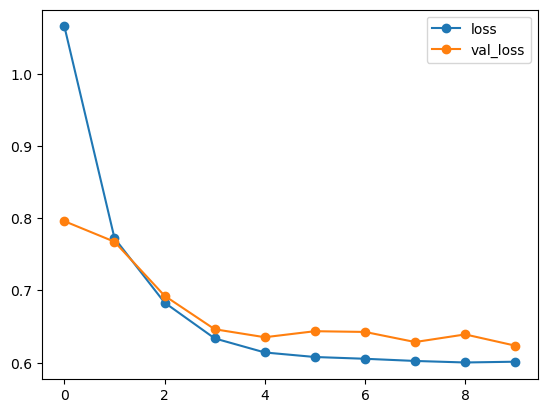

In [83]:
plot_curves(histories=[norm_history],
            line_settings=[{'label': 'non_norm', 'line_style': '-', 'marker': 'o'}],
            columns=['loss', 'val_loss'], y_label='loss')

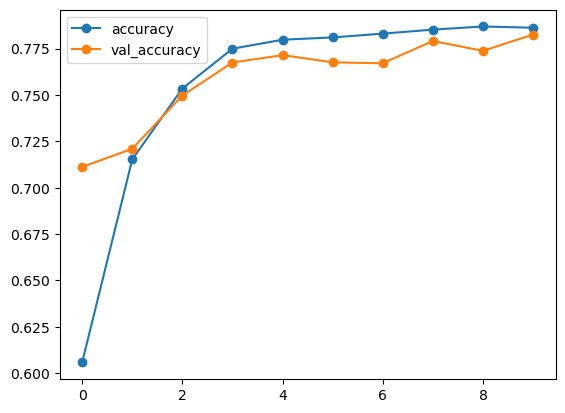

In [84]:
plot_curves(histories=[norm_history],
            line_settings=[{'label': 'non_norm', 'line_style': '-', 'marker': 'o'}],
            columns=['accuracy', 'val_accuracy'], y_label='accuracy')

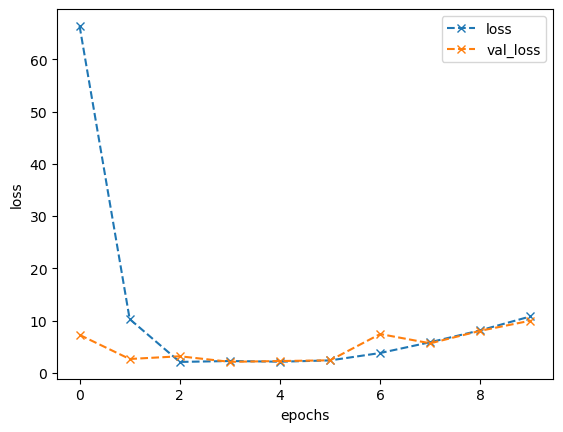

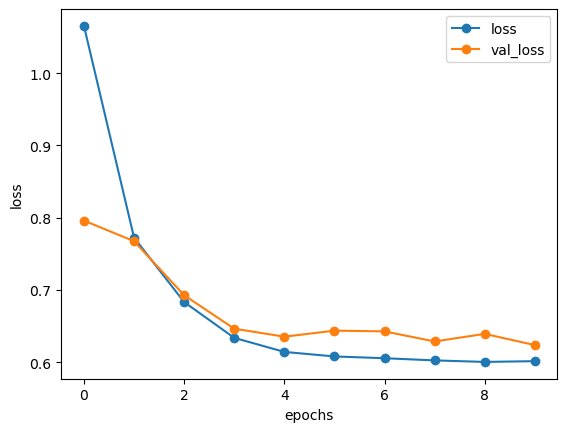

In [90]:
plot_curves(histories=[non_norm_history, norm_history],
            line_settings=[{'label': 'non_norm', 'line_style': '--', 'marker': 'x'},
                           {'label': 'norm_history', 'line_style': '-', 'marker': 'o'}],
            columns=['loss', 'val_loss'], y_label='loss')

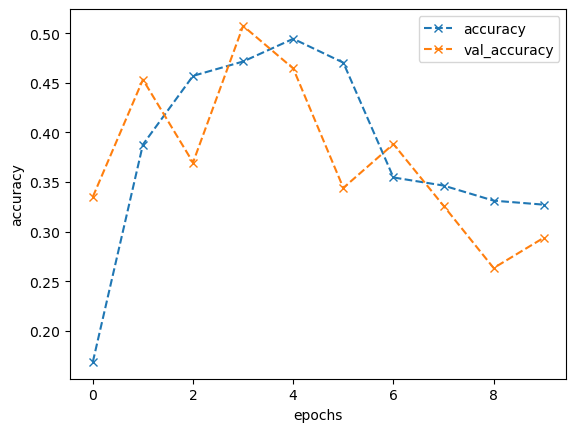

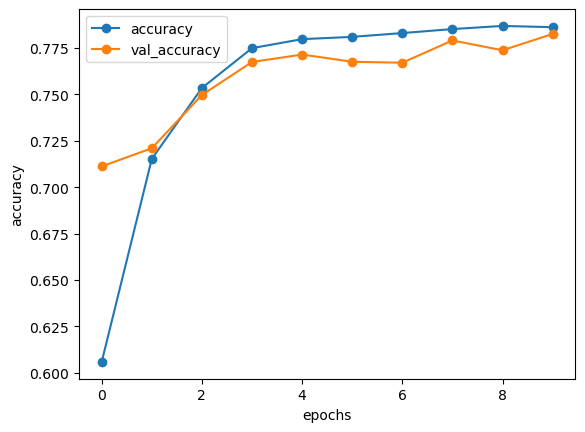

In [91]:
plot_curves(histories=[non_norm_history, norm_history],
            line_settings=[{'label': 'non_norm', 'line_style': '--', 'marker': 'x'},
                           {'label': 'norm_history', 'line_style': '-', 'marker': 'o'}],
            columns=['accuracy', 'val_accuracy'], y_label='accuracy')

## Finding the ideal Learning Rate

In [96]:
tf.random.set_seed(RANDOM_SEED)
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_13.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_schedular])

Epoch 1/40
   9/1875 [..............................] - ETA: 12s - loss: 2.3232 - accuracy: 0.1389 

2023-09-17 14:02:09.543271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1866/1875 [============================>.] - ETA: 0s - loss: 1.1214 - accuracy: 0.5538

2023-09-17 14:02:19.526292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 1.1198 - accuracy: 0.5545 - val_loss: 0.9029 - val_accuracy: 0.6654 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8370 - accuracy: 0.6896 - val_loss: 0.7772 - val_accuracy: 0.7240 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7190 - accuracy: 0.7391 - val_loss: 0.7033 - val_accuracy: 0.7367 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6790 - accuracy: 0.7498 - val_loss: 0.6838 - val_accuracy: 0.7385 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6716 - accuracy: 0.7509 - val_loss: 0.6937 - val_accuracy: 0.7509 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6558 - accuracy: 0.7568 - val_loss: 0.6772 - val_accuracy: 0.7512 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 11s 6ms

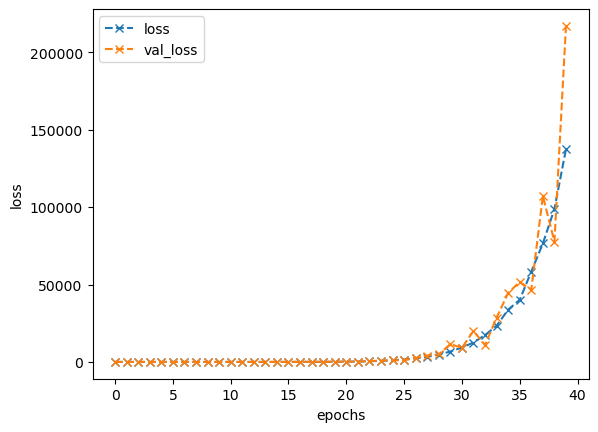

Text(0.5, 1.0, 'Finding the idea learning rate')

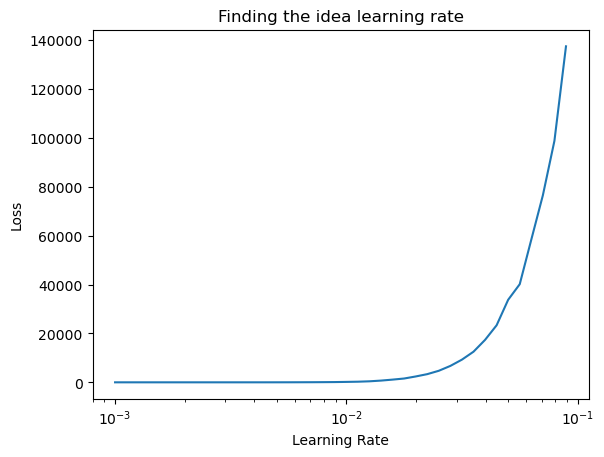

In [105]:
lrs = 1e-3 * (10 ** (tf.range(40) / 20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the idea learning rate")

In [115]:
df_lr_history = pd.DataFrame(find_lr_history.history)
df_lr_history.loc[df_lr_history['loss'].argmin(), :]['lr']

0.00199526222422719

In [113]:
df_lr_history.loc[:, ['loss', 'lr']]

,loss,lr
0,1.119759,0.001000
1,0.836983,0.001122
2,0.719003,0.001259
3,0.678998,0.001413
4,0.671644,0.001585
5,0.655804,0.001778
6,0.650810,0.001995
7,0.664621,0.002239
8,0.702621,0.002512
9,0.790250,0.002818


In [ ]:
tf.random.set_seed(RANDOM_SEED)
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
])
model_14.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00199526222422719),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=)

In [25]:
def min_machines(start, end):
    tasks = sorted(zip(start, end))
    print(tasks)
    # print(tasks)

    max_overlap = 0
    current_overlap = 1  # Starting with the first task

    # We'll use a pointer 'end_ptr' to keep track of the current end time
    end_ptr = 0

    for i in range(1, len(tasks)):
        # print(current_overlap, max_overlap)
        if tasks[i][0] < tasks[end_ptr][1]:  # Overlapping condition
            current_overlap += 1
        else:
            end_ptr += 1  # Move to next task's end time
            current_overlap -= 1
        if tasks[i][1] > tasks[end_ptr][1]:
            end_ptr = i
        print(current_overlap)

        max_overlap = max(max_overlap, current_overlap)

    return max_overlap


# Sample input
start = [5, 2, 1, 5, 5, 8]
end = [5, 5, 3, 8, 6, 12]

print(min_machines(start, end))  # Expected output: 3

[(1, 3), (2, 5), (5, 5), (5, 6), (5, 8), (8, 12)]
2
1
0
1
0
2
